In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from collections import defaultdict
from tqdm.notebook import tqdm

# np.random.seed(42) 

In [2]:

data = pd.read_csv("data/TCGAdata.txt", sep=" ")
labels = pd.read_csv("data/TCGAlabels", sep=" ")

data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1991,V1992,V1993,V1994,V1995,V1996,V1997,V1998,V1999,V2000
1,-1.168003,1.261756,-1.534537,-0.156028,-0.700344,3.985627,2.432774,0.767859,1.225563,-0.198581,...,-0.015099,-0.217915,0.123574,-3.209894,-1.26123,-1.676247,-0.8625,-1.103947,-1.109631,0.43515
2,-3.272103,-0.269244,-1.534537,-0.679228,-0.947544,0.794827,0.067374,0.033459,-0.010137,-0.198581,...,0.285601,-0.155615,1.044074,-3.209894,-2.37073,1.973753,-1.9055,-1.103947,-1.109631,0.89295
3,-0.861503,-0.189544,-1.534537,0.010572,-0.268144,1.808827,1.273274,-0.501841,0.753163,-0.198581,...,-1.816599,-0.217015,0.023974,-3.209894,-0.27183,0.245753,-1.2135,-1.103947,-1.109631,-0.45655
4,-0.595803,-0.580044,-1.534537,-0.107828,-0.475644,0.738027,-1.945726,0.476859,-0.010137,-0.198581,...,-0.532399,-0.402215,-0.410726,-3.209894,0.36967,1.586153,-0.5700,-1.103947,1.215569,0.45415
5,1.336097,0.360556,-1.534537,-0.097728,0.359656,-0.940173,0.378774,-0.271741,-0.010137,-0.198581,...,-0.894799,0.043385,0.273874,-0.747594,-0.46893,-0.481547,0.6180,-1.103947,-0.392031,-0.88775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,-2.407703,-0.630444,-1.534537,-0.746028,-0.615444,2.733027,-2.976926,0.433959,-0.010137,-0.198581,...,-1.537899,0.185685,-1.025226,2.214606,-0.20143,4.214753,-2.8351,2.170853,-1.109631,0.21915
2884,0.626397,0.546456,-1.534537,0.291672,1.228856,1.607627,-0.696826,-0.359341,-0.010137,-0.198581,...,-3.281399,-0.248515,-0.691026,0.352406,0.52507,3.099053,-2.4853,-1.103947,1.709069,-1.31475
2885,-0.247003,1.178056,-1.534537,-0.232828,1.647956,3.450627,-0.517526,0.094659,-0.010137,-0.198581,...,-2.792999,-0.121515,-0.475626,1.095506,-1.49993,3.473553,2.9253,-1.103947,1.492969,-0.15755
2886,-0.765003,-0.291644,-0.409837,-0.533628,2.256756,1.657427,-3.786426,-2.083541,-0.010137,-0.198581,...,0.963001,-0.013315,0.250774,0.400806,-0.51443,3.139053,-2.9320,-1.103947,-1.109631,0.11055


In [4]:

accuracy_forest = []
accuracy_boosting = []
cross_val_scores_forest = []
cross_val_scores_boosting = []
scaling_factors = [10, 3, 1, 0.5, 0.1, 0]

feature_importances_forest = defaultdict(list)
feature_importances_boosting = defaultdict(list)
for val in tqdm(scaling_factors):

    noise = np.random.normal(0, data.std(), data.shape)
    noised_data = data + noise * val

    X_train, X_test, y_train, y_test = train_test_split(noised_data, labels, test_size=0.3)
    
    random_forest = RandomForestClassifier(n_estimators=50, n_jobs=-1)
    cross_val = cross_val_score(random_forest, X_train, y_train.values.ravel(), cv=5, n_jobs=-1)
    cross_val_scores_forest.append(cross_val)
    random_forest.fit(X_train, y_train.values.ravel())

    gradient_boosting = GradientBoostingClassifier(n_estimators=50)
    cross_val = cross_val_score(gradient_boosting, X_train, y_train.values.ravel(), cv=5, n_jobs=-1)
    cross_val_scores_boosting.append(cross_val)
    gradient_boosting.fit(X_train, y_train.values.ravel())

    feature_importances_boosting[val] = gradient_boosting.feature_importances_
    feature_importances_forest[val] = random_forest.feature_importances_


    print("Random Forest accuracy: ", f1_score(y_test, random_forest.predict(X_test), average=None), "for noise: ", val)
    accuracy_forest.append(f1_score(y_test, random_forest.predict(X_test), average=None))
    print("Gradient Boosting accuracy: ", f1_score(y_test, gradient_boosting.predict(X_test), average=None), "for noise: ", val)
    accuracy_boosting.append(f1_score(y_test, gradient_boosting.predict(X_test), average=None))
    print()
    

    

    

  0%|          | 0/6 [00:00<?, ?it/s]

Random Forest accuracy:  [0.60732113 0.         0.10784314 0.03076923 0.         0.        ] for noise:  10
Gradient Boosting accuracy:  [0.62748644 0.03508772 0.31799163 0.13333333 0.         0.        ] for noise:  10

Random Forest accuracy:  [0.65209472 0.         0.59340659 0.27135678 0.02083333 0.        ] for noise:  3
Gradient Boosting accuracy:  [0.82325581 0.54545455 0.87134503 0.73972603 0.59854015 0.15384615] for noise:  3

Random Forest accuracy:  [0.95782313 0.98275862 0.98974359 0.96178344 0.99378882 0.        ] for noise:  1
Gradient Boosting accuracy:  [0.9762901  0.97435897 0.99484536 0.98470948 0.96153846 0.48275862] for noise:  1

Random Forest accuracy:  [0.98670213 1.         0.99425287 0.98295455 0.9929078  0.56      ] for noise:  0.5
Gradient Boosting accuracy:  [0.98933333 0.99130435 0.99713467 0.99431818 0.9929078  0.66666667] for noise:  0.5

Random Forest accuracy:  [0.98535286 0.9787234  0.99456522 0.99692308 0.99363057 0.71794872] for noise:  0.1
Gradient 

## todo:
2. plotta gemensamma features i ensemble
3. plotta top 15 features för varje noise 
3. beräkna andelen av total mean impurity decrease om vi endast anvönder 15 features
4. räkna hur många man behöver för typ 80%? 
5. träna om med top 15 feature och jämföra. kör på test flera gånger och gör boxplot    
6. Kör för cats and dogs - skit i noise!!!!!!!!!!!!!!!!!!!!!!!!!


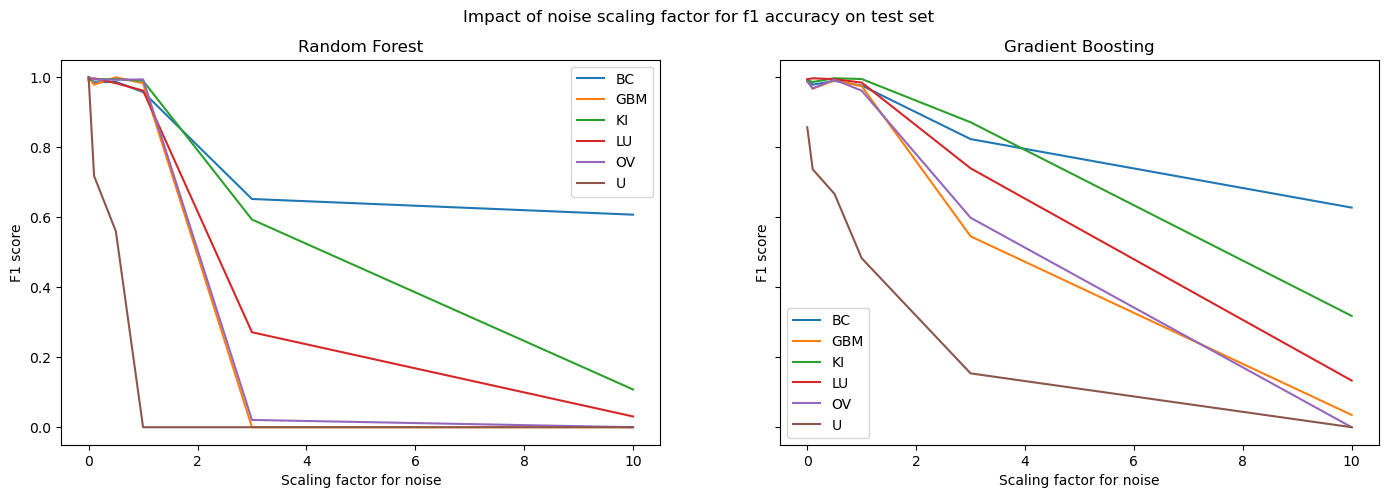

In [105]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5), sharey=True)
labels = unique_labels(y_test)

ax1.plot(scaling_factors, accuracy_forest, label=labels)
ax1.set_xlabel("Scaling factor for noise")
ax1.set_ylabel("F1 score")
ax1.set_title("Random Forest")
ax1.legend()

ax2.plot(scaling_factors, accuracy_boosting, label=labels)
ax2.set_xlabel("Scaling factor for noise")
ax2.set_ylabel("F1 score")
ax2.set_title("Gradient Boosting")

fig.suptitle("Impact of noise scaling factor for f1 accuracy on test set")
ax2.legend()


Text(0.5, 0, 'Scaling Factors')

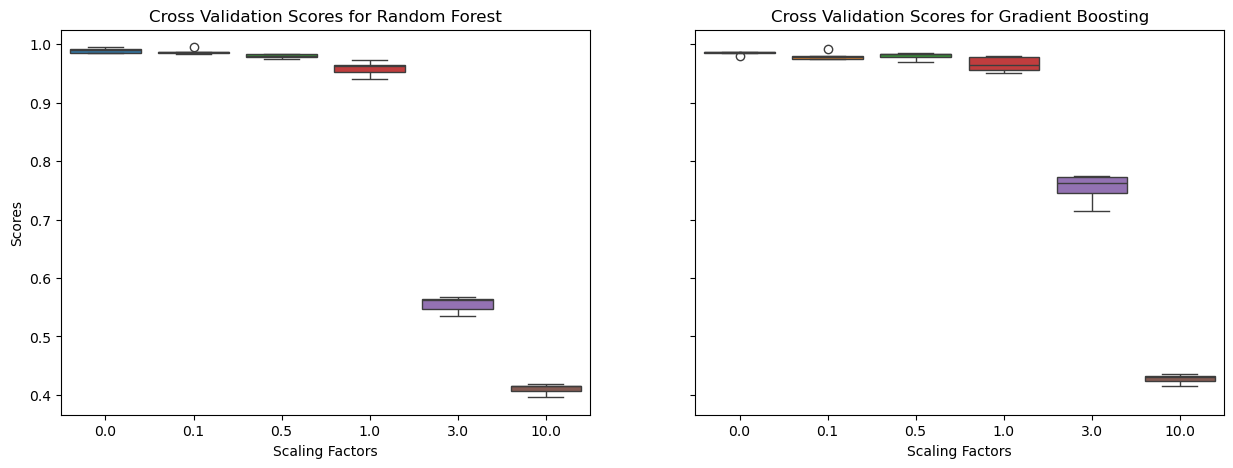

In [12]:
import seaborn as sns

# vad har detta med inlömningsuppgiften att göra?

# create a pandas dataframe for this
df_forest = pd.DataFrame(cross_val_scores_forest, index=scaling_factors).T
df_boosting = pd.DataFrame(cross_val_scores_boosting, index=scaling_factors).T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
# Boxplot for df_forest on the first subplot
sns.boxplot(data=df_forest, ax=ax1)
ax1.set_title('Cross Validation Scores for Random Forest')
ax1.set_ylabel('Scores')
ax1.set_xlabel('Scaling Factors')

# Boxplot for df_boosting on the second subplot
sns.boxplot(data=df_boosting, ax=ax2)
ax2.set_title('Cross Validation Scores for Gradient Boosting')
ax2.set_ylabel('Scores')
ax2.set_xlabel('Scaling Factors')


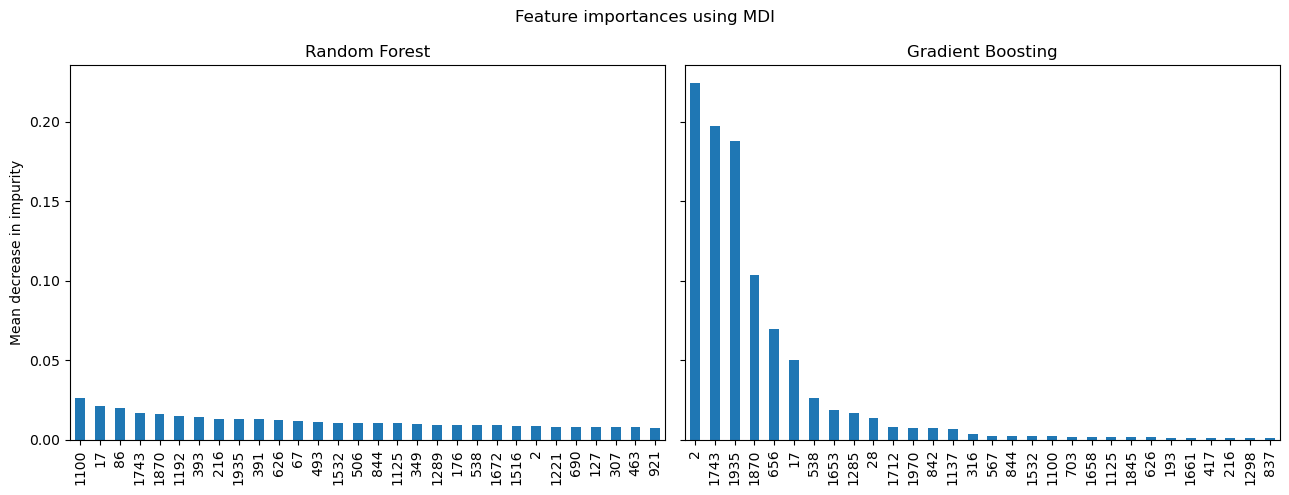

In [113]:
forest_importances = pd.Series(random_forest.feature_importances_)
boost_importances = pd.Series(gradient_boosting.feature_importances_)

# sort importances and stds in descending order
forest_importances = forest_importances.sort_values(ascending=False).head(30)
boost_importances = boost_importances.sort_values(ascending=False).head(30)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
# Plot for Random Forest importances
forest_importances.plot(kind='bar', ax=ax1)
ax1.set_title("Random Forest")
ax1.set_ylabel("Mean decrease in impurity")

# Plot for Gradient Boosting importances
boost_importances.plot(kind='bar', ax=ax2)
ax2.set_title("Gradient Boosting")
ax2.set_ylabel("Mean decrease in impurity")

fig.suptitle("Feature importances using MDI")
fig.tight_layout()
plt.show()

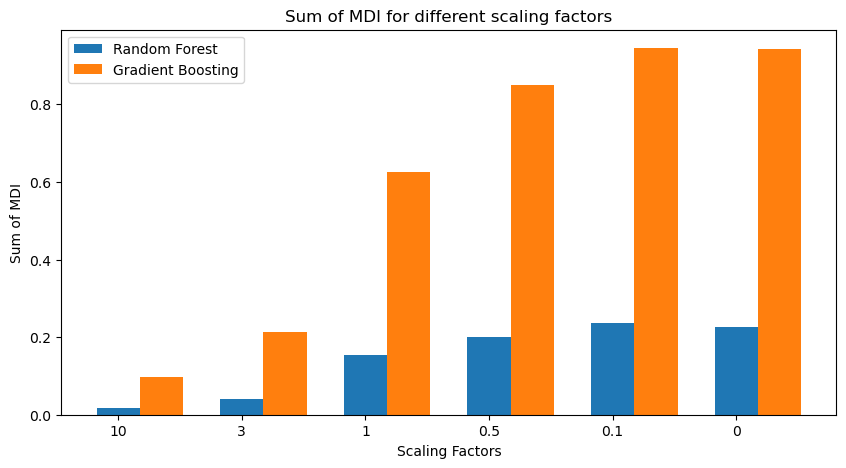

In [77]:
# ÄR SAMMA NUMBER OF FEATURES VIKTIGA?

bar_width = 0.35

bars_forest = []
bars_boosting = []

for noise in scaling_factors:
    forest_importances = pd.Series(feature_importances_forest[noise])
    boost_importances = pd.Series(feature_importances_boosting[noise])

    # sort importances and stds in descending order
    forest_importances = forest_importances.sort_values(ascending=False).head(15)
    boost_importances = boost_importances.sort_values(ascending=False).head(15)

    sum_mdi_boosting = boost_importances.sum()
    sum_mdi_forest = forest_importances.sum()
    
    bars_boosting.append(sum_mdi_boosting)
    bars_forest.append(sum_mdi_forest)

fig, ax = plt.subplots(figsize=(10, 5))
bar1 = ax.bar(np.arange(len(scaling_factors)), bars_forest, bar_width, label='Random Forest')
bar2 = ax.bar(np.arange(len(scaling_factors)) + bar_width, bars_boosting, bar_width, label='Gradient Boosting')

ax.set_xticks(np.arange(len(scaling_factors)))
ax.set_xticklabels(scaling_factors)
ax.set_xlabel('Scaling Factors')
ax.set_ylabel('Sum of MDI')
ax.set_title('Sum of MDI for different scaling factors')
ax.legend()

    
    
    
# SVAR NEJ, 


    
    

    
    
    

Text(0.5, 0.98, 'Count of top 15 features in each tree')

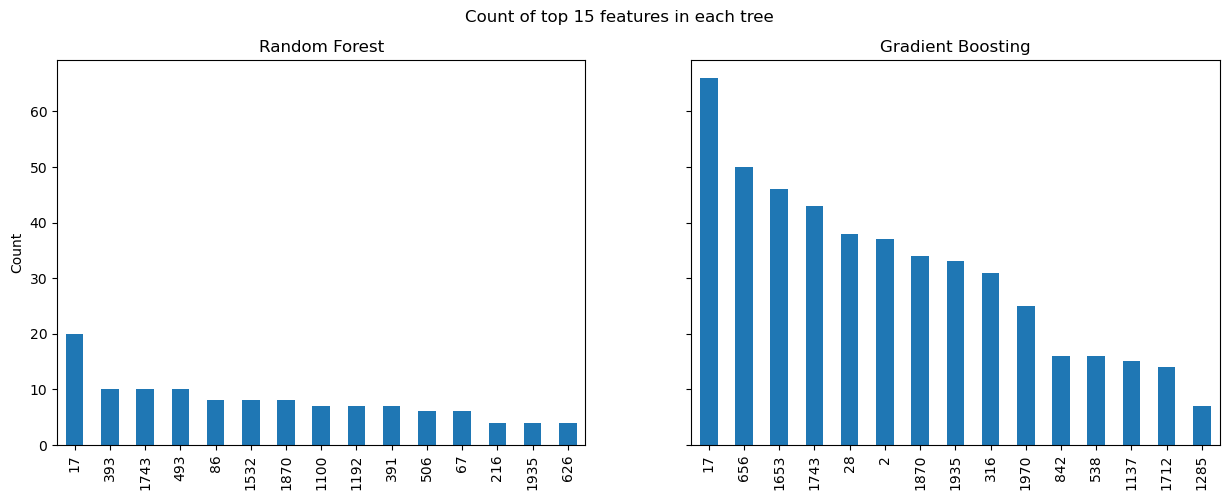

In [111]:
# count the number of times the top 15 features appear in each tree
from collections import defaultdict


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

top_15 = forest_importances.index[:15]

feature_counts = defaultdict(int)
for tree in random_forest.estimators_:
    top_15_tree = tree.feature_importances_.argsort()[::-1][:15]
    for feature in top_15_tree:
        if feature in top_15:
            feature_counts[feature] += 1
            


feature_counts = pd.Series(feature_counts).sort_values(ascending=False)

feature_counts.plot(kind='bar', ax=ax1)

ax1.set_title("Random Forest")
ax1.set_ylabel("Count")



top_15 = boost_importances.index[:15]

feature_counts = defaultdict(int)
for tree_group in gradient_boosting.estimators_:
    for tree in tree_group:
        top_15_tree = tree.feature_importances_.argsort()[::-1][:15]
        for feature in top_15_tree:
            if feature in top_15:
                feature_counts[feature] += 1

feature_counts = pd.Series(feature_counts).sort_values(ascending=False)

feature_counts.plot(kind='bar', ax=ax2)
ax2.set_title("Gradient Boosting")
ax2.set_ylabel("Count")
fig.suptitle("Count of top 15 features in each tree")

Text(0.5, 0.98, 'Overlap of top 15 features between Random Forest and Gradient Boosting')

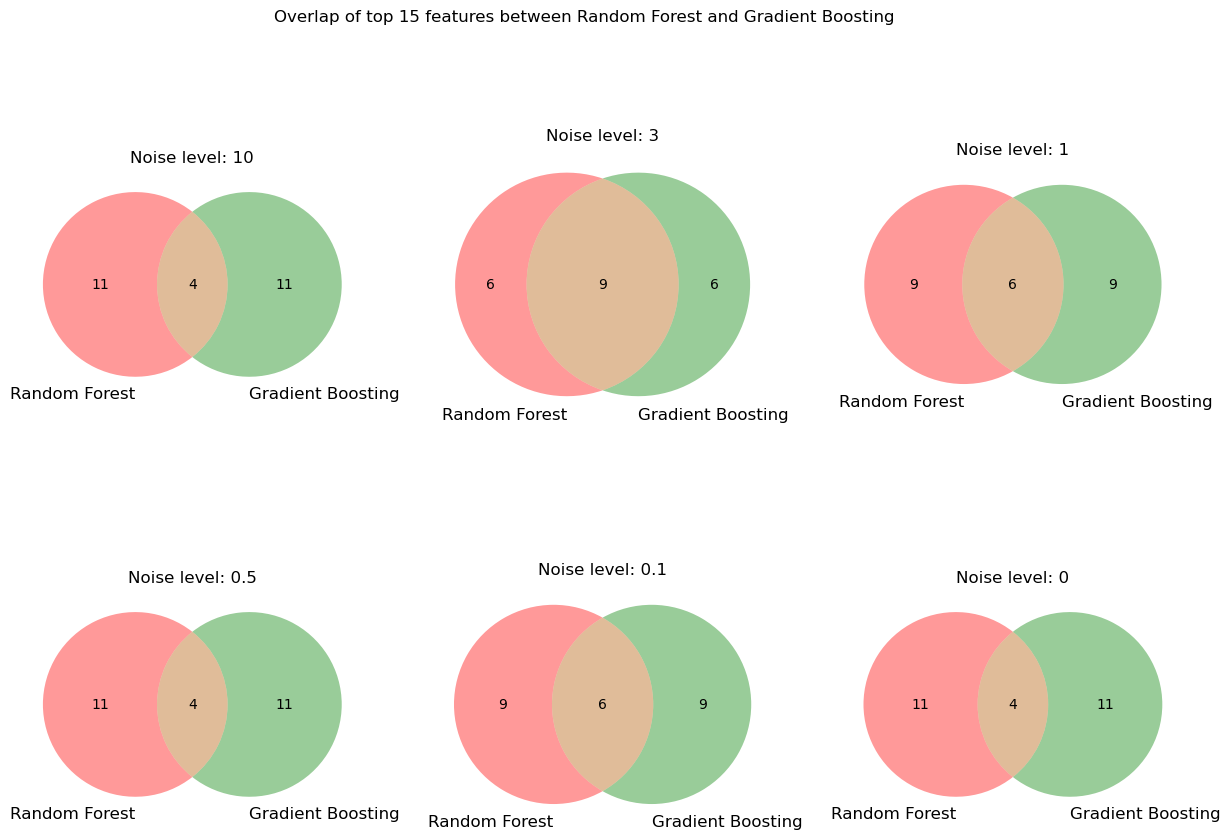

In [110]:
# plot the overlap of features between the two models in a venn diagram  for each noise level

from matplotlib_venn import venn2

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    noise = scaling_factors[i]
    top_15_forest = feature_importances_forest[noise].argsort()[::-1][:15]
    top_15_boosting = feature_importances_boosting[noise].argsort()[::-1][:15]
    venn2([set(top_15_forest), set(top_15_boosting)], set_labels=('Random Forest', 'Gradient Boosting'), ax=ax)
    ax.set_title(f"Noise level: {noise}")

fig.suptitle("Overlap of top 15 features between Random Forest and Gradient Boosting")


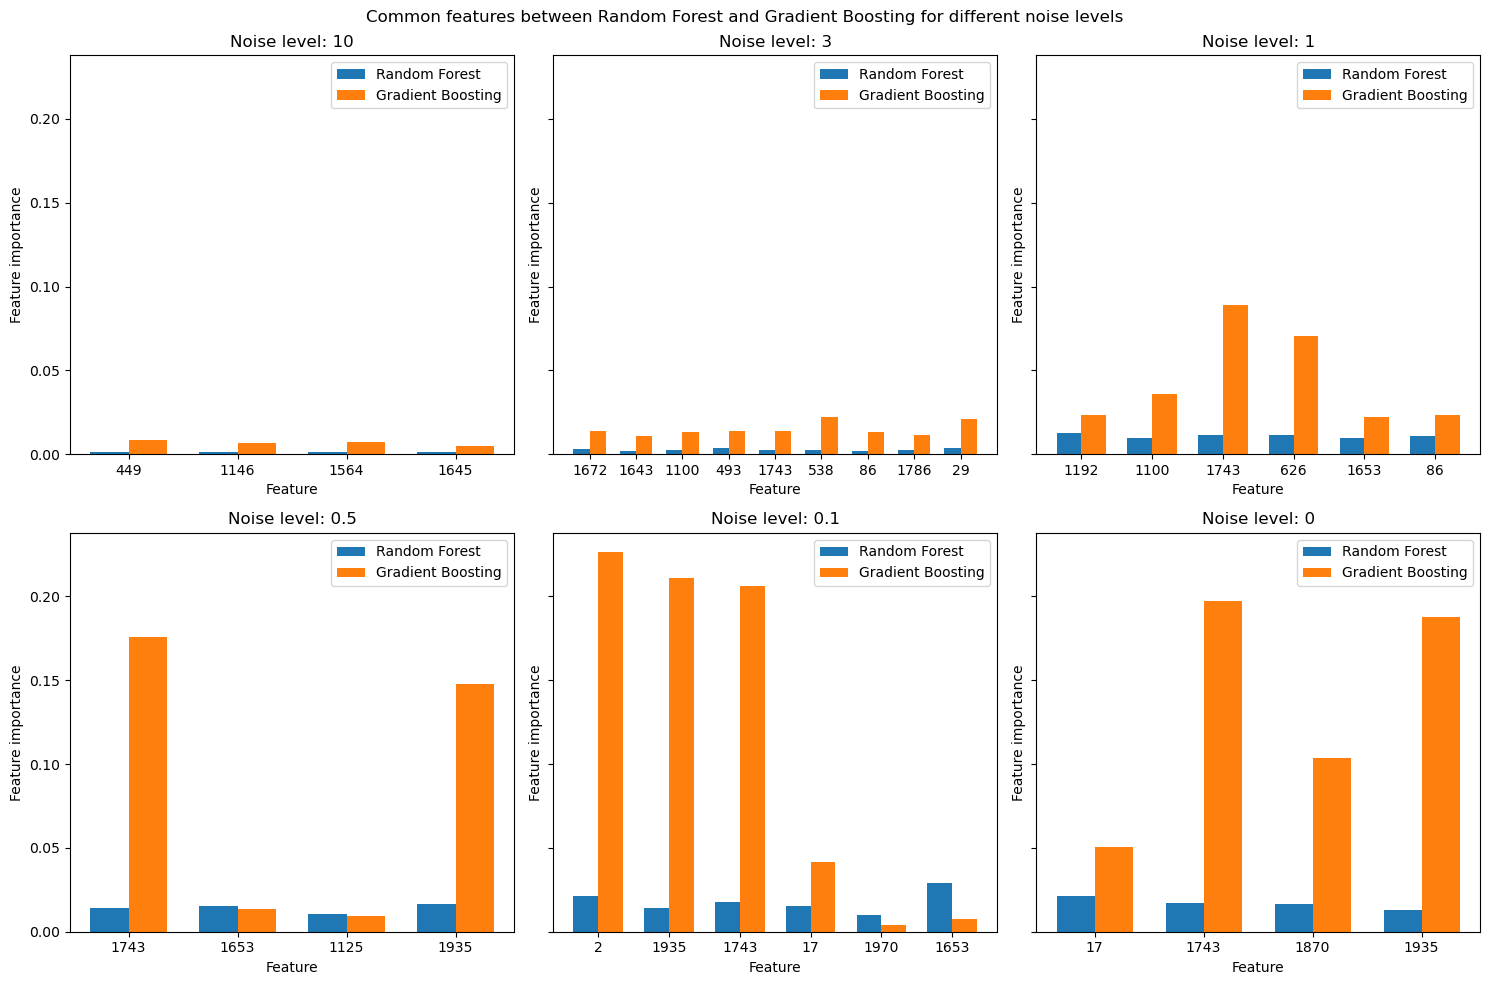

In [86]:
# overlap between features

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
bar_width = 0.35

for i, ax in enumerate(axes.flat):
    noise = scaling_factors[i]
    top_15_forest = feature_importances_forest[noise].argsort()[::-1][:15]
    top_15_boosting = feature_importances_boosting[noise].argsort()[::-1][:15]
    common_features = set(top_15_forest).intersection(set(top_15_boosting))
    common_features = list(common_features)
    common_importances_forest = feature_importances_forest[noise][common_features]
    common_importances_boosting = feature_importances_boosting[noise][common_features]
    common_features = [str(f) for f in common_features]
    
    # Adjust the positions of the bars
    bar1_positions = np.arange(len(common_features))
    bar2_positions = [x + bar_width for x in bar1_positions]
    
    ax.bar(bar1_positions, common_importances_forest, width=bar_width, label='Random Forest')
    ax.bar(bar2_positions, common_importances_boosting, width=bar_width, label='Gradient Boosting')
    
    ax.set_title(f"Noise level: {noise}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Feature importance")
    ax.set_xticks([r + bar_width / 2 for r in range(len(common_features))])
    ax.set_xticklabels(common_features)
    ax.legend()

fig.suptitle("Common features between Random Forest and Gradient Boosting for different noise levels")
fig.tight_layout()









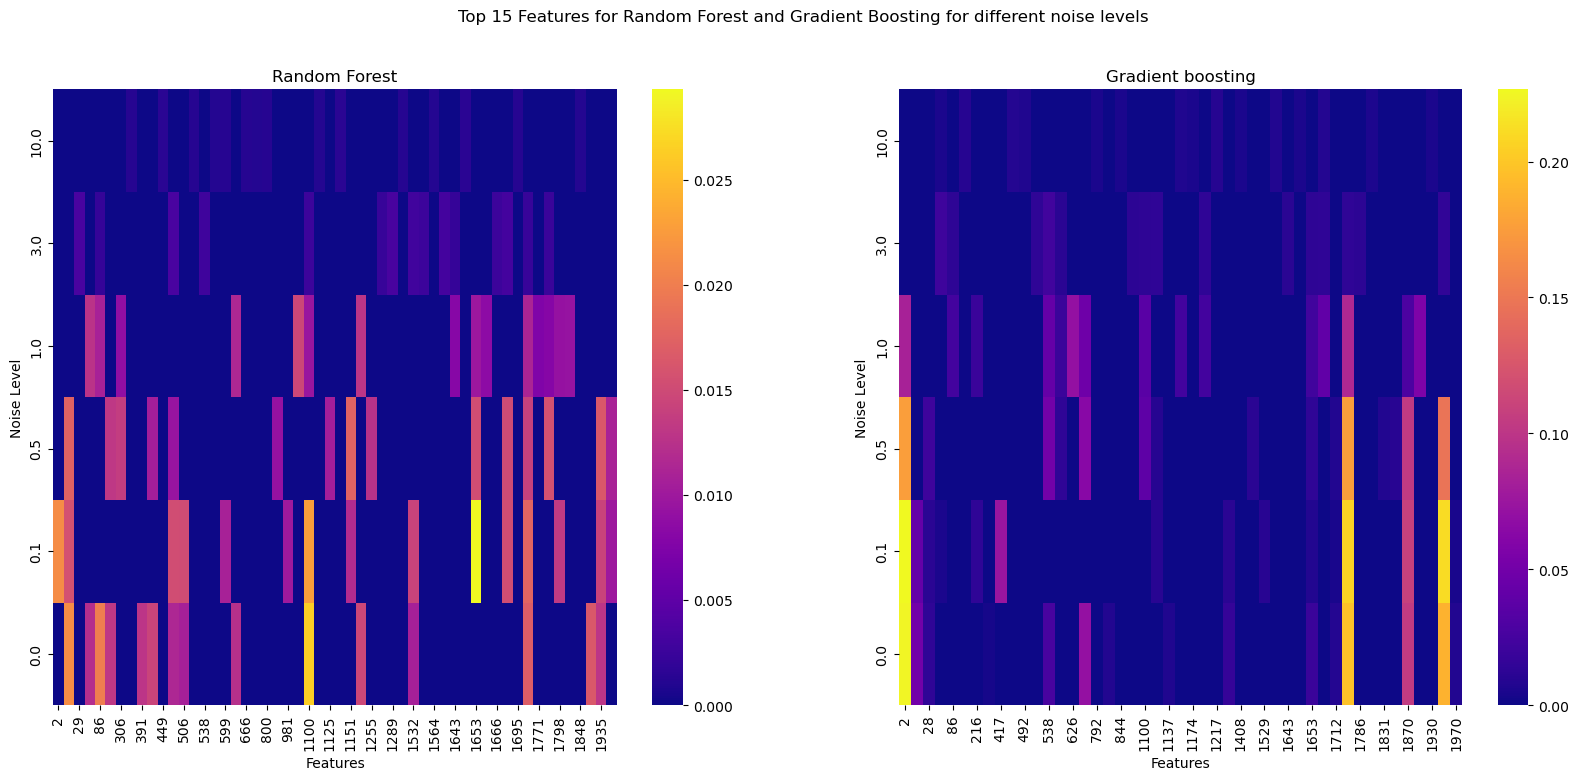

In [109]:
forest_df = pd.DataFrame(feature_importances_forest)
boosting_df = pd.DataFrame(feature_importances_boosting)

top_features_forest = forest_df.apply(lambda x: x.sort_values(ascending=False).head(15), axis=0)
top_features_boosting = boosting_df.apply(lambda x: x.sort_values(ascending=False).head(15), axis=0)

top_features_forest.fillna(0, inplace=True)
top_features_boosting.fillna(0, inplace=True)
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot heatmap for Random Forest

sns.heatmap(top_features_forest.T, cmap="plasma", ax=axes[0])

axes[0].set_ylabel('Noise Level')
axes[0].set_xlabel('Features')
axes[0].set_title("Random Forest")

# Plot heatmap for Gradient Boosting

sns.heatmap(top_features_boosting.T, cmap="plasma", ax=axes[1])

axes[1].set_ylabel('Noise Level')
axes[1].set_xlabel('Features')
axes[1].set_title("Gradient boosting")


fig.suptitle('Top 15 Features for Random Forest and Gradient Boosting for different noise levels')
plt.show()